In [ ]:
import pandas
data = pandas.read_csv("wholesale_customers_data.csv", header=0, sep=",", decimal=",")
print(data.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [3]:
#data = data.drop(['Channel', 'Region'], axis=1)
#print(data.columns)

In [4]:
print(data['Channel'].value_counts())

1    298
2    142
Name: Channel, dtype: int64


In [5]:
from IPython.display import display
display(data.head(5))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
print(data['Channel'].value_counts(normalize=True))

1    0.677273
2    0.322727
Name: Channel, dtype: float64


In [7]:
print(data['Region'].value_counts())

3    316
1     77
2     47
Name: Region, dtype: int64


In [8]:
data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
for feature in ['Channel', 'Region']:
    data[feature] = data[feature].astype('category')
data.describe(include=['category'])

,Channel,Region
count,440,440
unique,2,3
top,1,3
freq,298,316


In [10]:
data.describe(include='all').loc['count']

Channel             440.0
Region              440.0
Fresh               440.0
Milk                440.0
Grocery             440.0
Frozen              440.0
Detergents_Paper    440.0
Delicassen          440.0
Name: count, dtype: float64

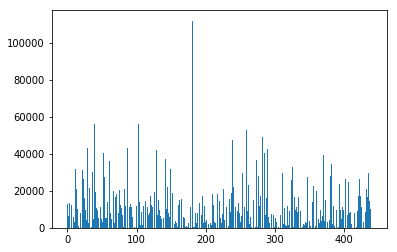

In [11]:
import matplotlib.pyplot as pyplot
import numpy
ind = numpy.arange(data['Fresh'].count())
pyplot.bar(ind, data['Fresh'])
pyplot.show()

In [12]:
print(data[data['Fresh'] > 80000])

    Channel Region   Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
181       1      3  112151  29627    18148   16745              4948   

     Delicassen  
181        8550  


In [13]:
mean_for_fresh = data[(data['Fresh'] < 80000) & (data['Region'] == 3) & (data['Channel'] == 1)]['Fresh'].mean()
print(mean_for_fresh)
data.loc[data['Fresh'] > 80000, 'Fresh'] = mean_for_fresh

13410.085714285715


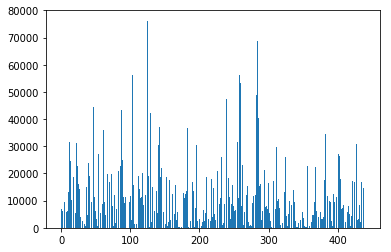

In [14]:
pyplot.bar(ind, data['Fresh'])
pyplot.show()

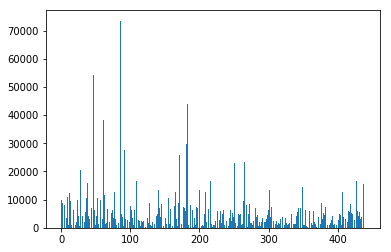

In [15]:
ind = numpy.arange(data['Milk'].count())
pyplot.bar(ind, data['Milk'])
pyplot.show()

In [20]:
print(data[data['Milk'] > 30000])

    Channel Region    Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
23        2      3  26373.0  36423    22019    5154              4337   
47        2      3  44466.0  54259    55571    7782             24171   
61        2      3  35942.0  38369    59598    3254             26701   
85        2      3  16117.0  46197    92780    1026             40827   
86        2      3  22925.0  73498    32114     987             20070   
183       1      3  36847.0  43950    20170   36534               239   

     Delicassen  
23        16523  
47         6465  
61         2017  
85         2944  
86          903  
183       47943  


In [21]:
mean_for_fresh = data[(data['Milk'] < 30000) & (data['Region'] == 3)]['Milk'].mean()
print(mean_for_fresh)
data.loc[data['Milk'] > 30000, 'Milk'] = mean_for_fresh

5148.590322580645


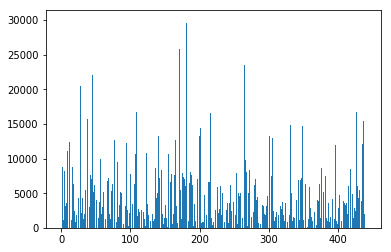

In [22]:
pyplot.bar(ind, data['Milk'])
pyplot.show()

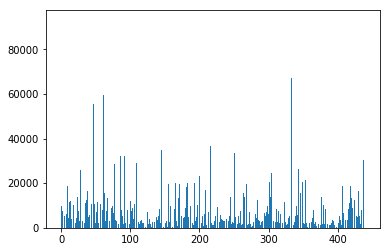

In [23]:
ind = numpy.arange(data['Grocery'].count())
pyplot.bar(ind, data['Grocery'])
pyplot.show()

In [24]:
print(data[data['Grocery'] > 40000])

    Channel Region    Fresh          Milk  Grocery  Frozen  Detergents_Paper  \
47        2      3  44466.0   5148.590323    55571    7782             24171   
61        2      3  35942.0   5148.590323    59598    3254             26701   
65        2      3     85.0  20959.000000    45828      36             24231   
85        2      3  16117.0   5148.590323    92780    1026             40827   
333       2      2   8565.0   4980.000000    67298     131             38102   

     Delicassen  
47         6465  
61         2017  
65         1423  
85         2944  
333        1215  


In [25]:
mean_for = data[(data['Grocery'] < 40000) & (data['Channel'] == 2)]['Grocery'].mean()
print(mean_for)
data.loc[data['Grocery'] > 40000, 'Grocery'] = mean_for

14574.963503649635


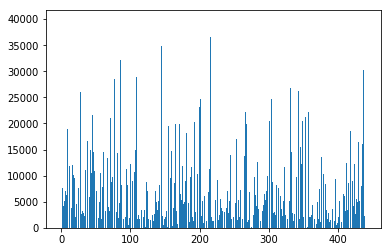

In [26]:
pyplot.bar(ind, data['Grocery'])
pyplot.show()

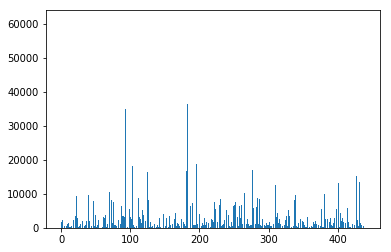

In [27]:
ind = numpy.arange(data['Frozen'].count())
pyplot.bar(ind, data['Frozen'])
pyplot.show()

In [28]:
print(data[data['Frozen'] > 20000])

    Channel Region    Fresh          Milk  Grocery  Frozen  Detergents_Paper  \
93        1      3  11314.0   3090.000000   2062.0   35009                71   
183       1      3  36847.0   5148.590323  20170.0   36534               239   
325       1      2  32717.0  16784.000000  13626.0   60869              1272   

     Delicassen  
93         2698  
183       47943  
325        5609  


In [29]:
mean_for = data[(data['Frozen'] < 20000) & (data['Channel'] == 1)]['Frozen'].mean()
print(mean_for)
data.loc[data['Frozen'] > 20000, 'Frozen'] = mean_for

3337.515254237288


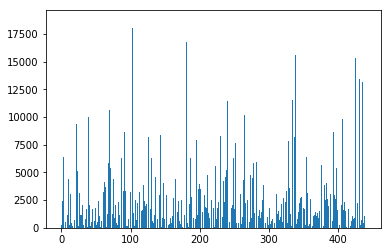

In [30]:
pyplot.bar(ind, data['Frozen'])
pyplot.show()

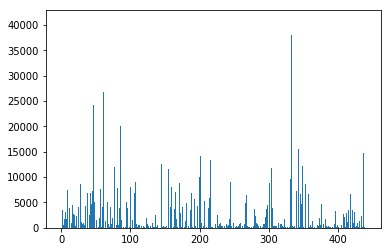

In [31]:
ind = numpy.arange(data['Detergents_Paper'].count())
pyplot.bar(ind, data['Detergents_Paper'])
pyplot.show()

In [33]:
print(data[data['Detergents_Paper'] > 20000])

    Channel Region    Fresh          Milk       Grocery  Frozen  \
47        2      3  44466.0   5148.590323  14574.963504  7782.0   
61        2      3  35942.0   5148.590323  14574.963504  3254.0   
65        2      3     85.0  20959.000000  14574.963504    36.0   
85        2      3  16117.0   5148.590323  14574.963504  1026.0   
86        2      3  22925.0   5148.590323  32114.000000   987.0   
333       2      2   8565.0   4980.000000  14574.963504   131.0   

     Detergents_Paper  Delicassen  
47              24171        6465  
61              26701        2017  
65              24231        1423  
85              40827        2944  
86              20070         903  
333             38102        1215  


In [34]:
mean_for = data[(data['Detergents_Paper'] < 20000) & (data['Channel'] == 2)]['Detergents_Paper'].mean()
print(mean_for)
data.loc[data['Detergents_Paper'] > 20000, 'Detergents_Paper'] = mean_for

6310.058823529412


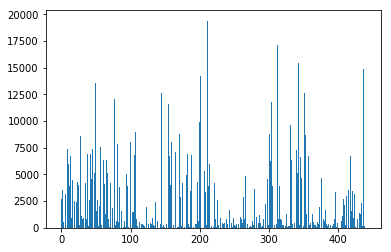

In [35]:
pyplot.bar(ind, data['Detergents_Paper'])
pyplot.show()

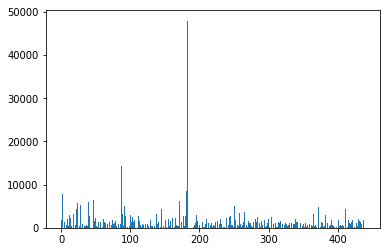

In [36]:
ind = numpy.arange(data['Delicassen'].count())
pyplot.bar(ind, data['Delicassen'])
pyplot.show()

In [37]:
print(data[data['Delicassen'] > 10000])

    Channel Region    Fresh         Milk  Grocery       Frozen  \
23        2      3  26373.0  5148.590323  22019.0  5154.000000   
71        1      3  18291.0  1266.000000  21042.0  5373.000000   
87        1      3  43265.0  5025.000000   8117.0  6312.000000   
183       1      3  36847.0  5148.590323  20170.0  3337.515254   

     Detergents_Paper  Delicassen  
23             4337.0       16523  
71             4173.0       14472  
87             1579.0       14351  
183             239.0       47943  


In [38]:
mean_for = data[(data['Delicassen'] < 10000) & (data['Region'] == 3)]['Delicassen'].mean()
print(mean_for)
data.loc[data['Delicassen'] > 10000, 'Delicassen'] = mean_for

1342.375


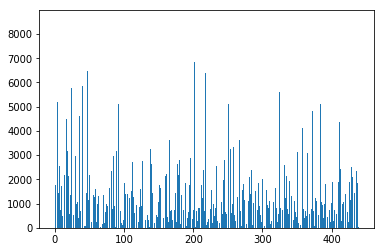

In [39]:
pyplot.bar(ind, data['Delicassen'])
pyplot.show()

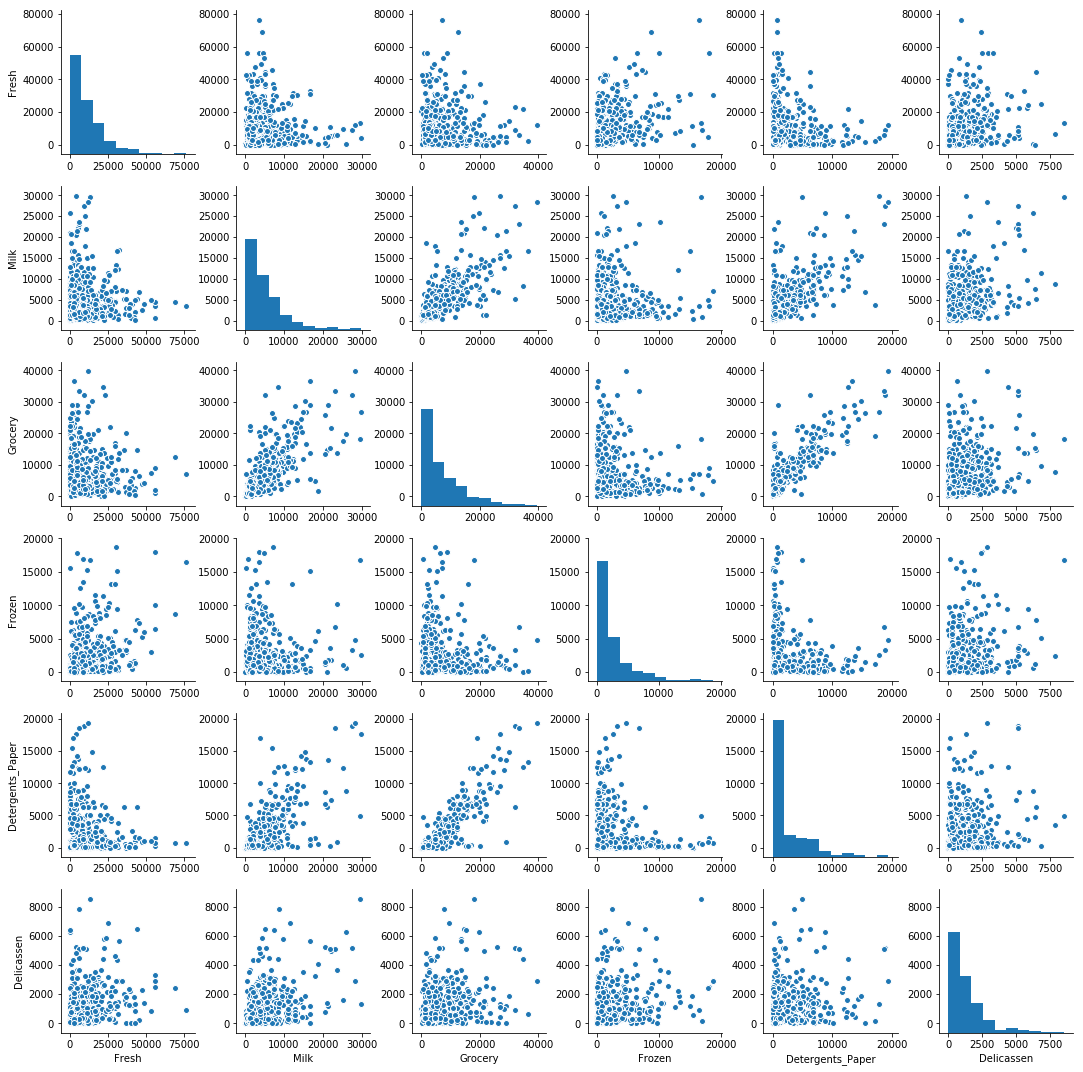

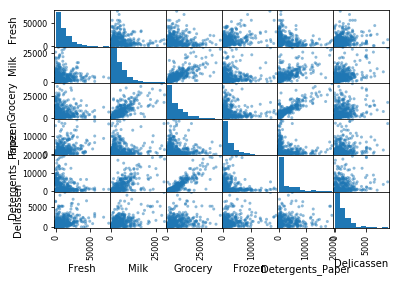

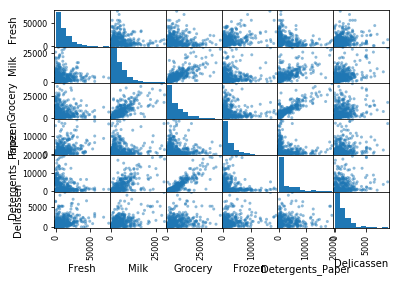

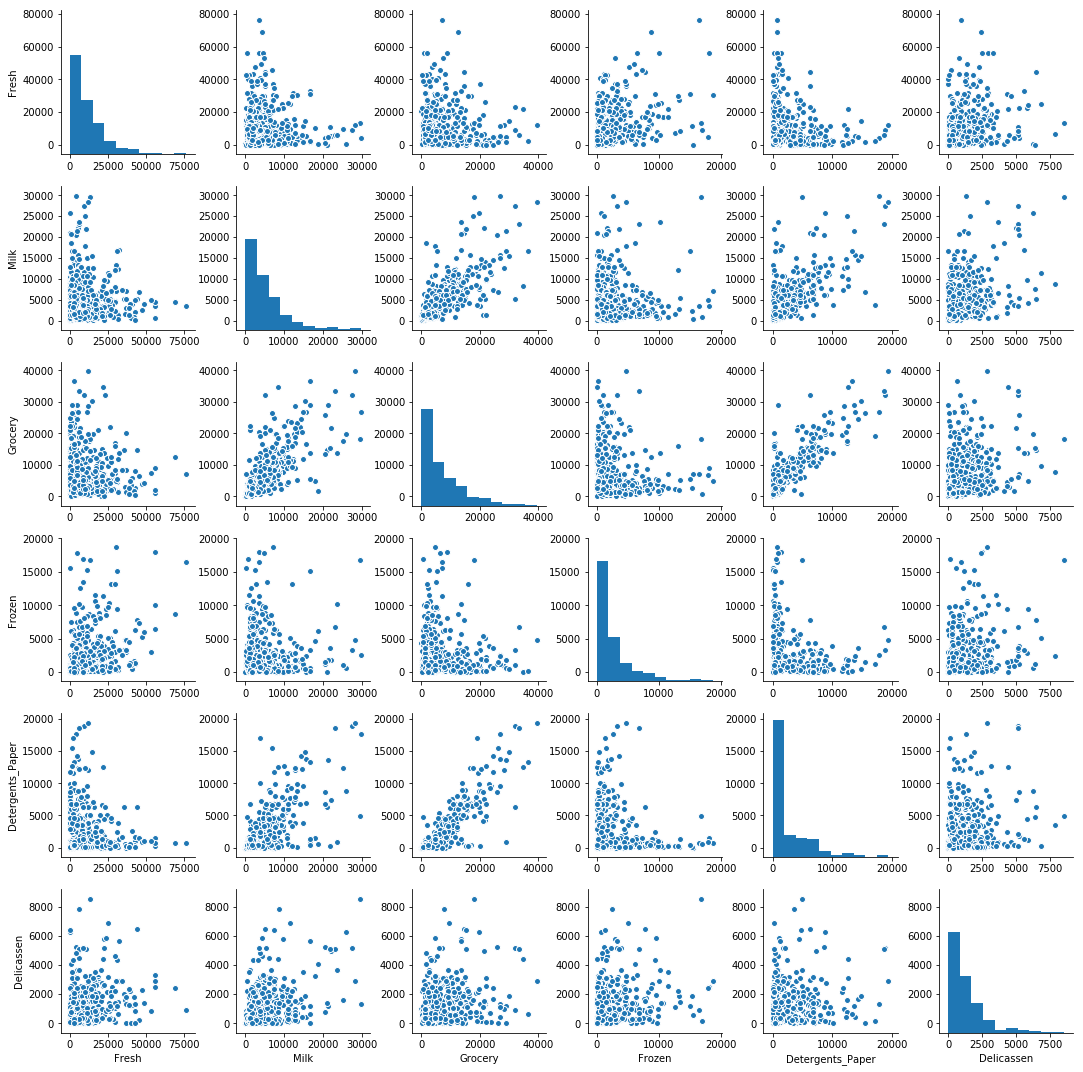

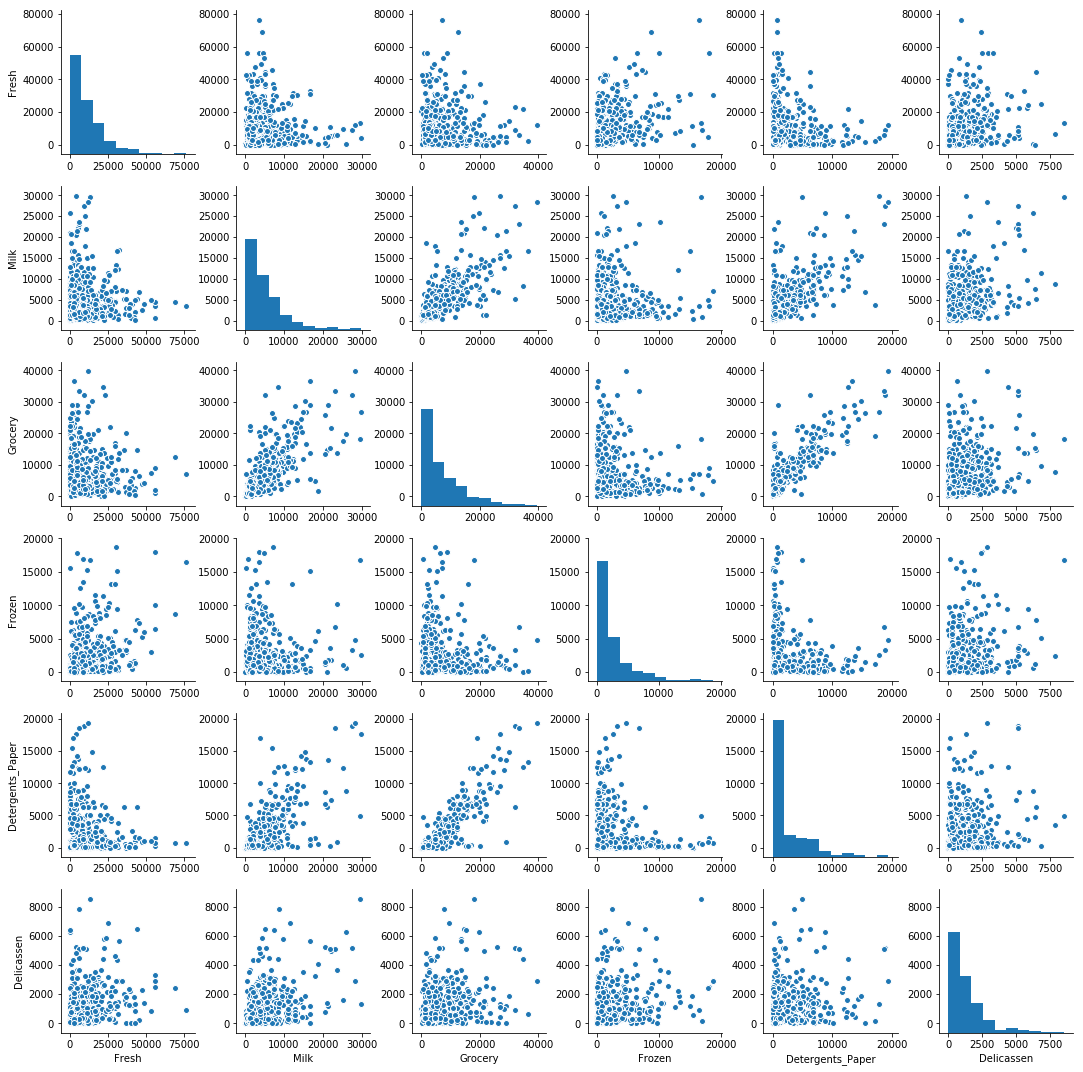

In [55]:
import seaborn
seaborn.pairplot(data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
pyplot.show()

In [45]:
quantitative = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
display(quantitative.head(5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [47]:
X = quantitative.values
print(X)

[[ 12669.   9656.   7561.    214.   2674.   1338.]
 [  7057.   9810.   9568.   1762.   3293.   1776.]
 [  6353.   8808.   7684.   2405.   3516.   7844.]
 ..., 
 [ 14531.  15488.  30243.    437.  14841.   1867.]
 [ 10290.   1981.   2232.   1038.    168.   2125.]
 [  2787.   1698.   2510.     65.    477.     52.]]


In [48]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler().fit(X)
X_normalized = stand_scaler.transform(X)
print(X_normalized)

[[ 0.07637362  0.86241297  0.02423223 -0.77844674  0.02874637  0.00983661]
 [-0.40353045  0.89222649  0.30403746 -0.31133366  0.20294646  0.34262181]
 [-0.46373224  0.69824503  0.04138023 -0.11730671  0.26570352  4.95298853]
 ..., 
 [ 0.23560053  1.99145478  3.18643565 -0.7111559   3.4528053   0.41176212]
 [-0.12706397 -0.62342308 -0.71870852 -0.52980257 -0.67649664  0.60778628]
 [-0.76867485 -0.67821026 -0.67995124 -0.82340789 -0.5895373  -0.96724507]]


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_normalized)
X_reduced = pca.transform(X_normalized)
print(X_reduced)

[[  5.56659152e-01  -3.14748944e-01]
 [  9.28899436e-01  -1.55917081e-01]
 [  1.83894844e+00   2.22347959e+00]
 [ -1.02134132e+00   8.75044023e-01]
 [  4.48470406e-01   2.26093982e+00]
 [  1.28779544e-01  -3.62209446e-01]
 [ -2.32532617e-01  -7.76558717e-01]
 [  5.66705838e-01   3.18295079e-02]
 [ -3.59212905e-01  -9.62870744e-01]
 [  2.53125318e+00  -2.80870702e-01]
 [  1.12153508e+00  -5.81661990e-02]
 [ -1.09268427e+00  -5.47237279e-01]
 [  1.42764432e+00   1.29930421e+00]
 [  1.09526877e+00   1.57467179e-01]
 [  1.28172338e+00   5.45764556e-01]
 [ -1.03686687e+00  -9.26564364e-01]
 [  1.20449634e+00  -1.08547774e+00]
 [  1.20025800e-01   6.42566191e-01]
 [  6.47136670e-01   9.71157624e-01]
 [ -1.69448261e-01  -9.73553708e-01]
 [ -2.04876513e-01   2.67627498e-01]
 [ -1.30101836e+00  -5.41057487e-01]
 [ -4.53399532e-01   3.27013527e+00]
 [  1.19039182e+00   1.12952188e+00]
 [  1.98122115e+00   2.34076773e+00]
 [ -7.25351025e-02  -8.12289470e-01]
 [ -1.23895582e+00  -2.58407673e-01]
 

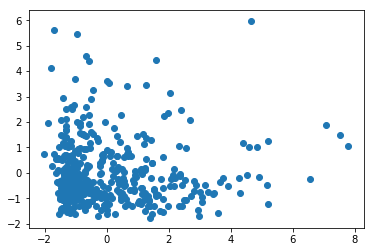

In [50]:
pyplot.scatter(X_reduced[:,0], X_reduced[:,1])
pyplot.show()

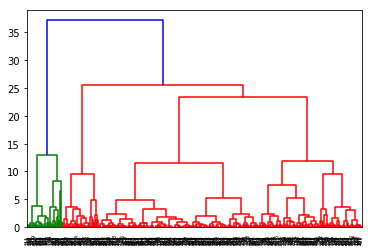

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_reduced, method='ward', metric='euclidean')
pyplot.figure()
dn = dendrogram(Z)
pyplot.show()

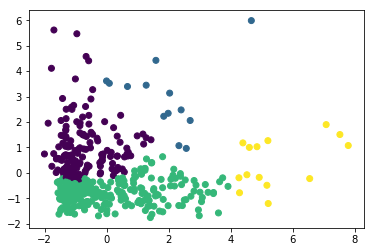

In [63]:
from sklearn.cluster import AgglomerativeClustering
lables = AgglomerativeClustering(n_clusters=4, affinity='manhattan', linkage='complete').fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

In [64]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_reduced, lables, metric='manhattan'))

0.304187143189


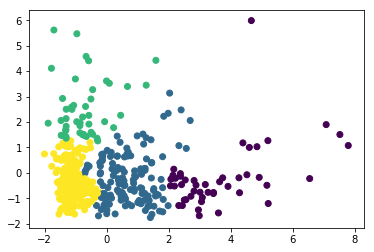

In [70]:
from sklearn.cluster import AgglomerativeClustering
lables = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

In [68]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_reduced, lables, metric='euclidean'))

0.405167328839


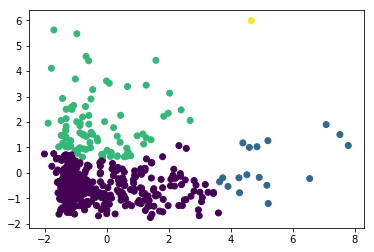

In [72]:
from sklearn.cluster import AgglomerativeClustering
lables = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

In [73]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X_reduced, lables, metric='euclidean'))

0.367702166151


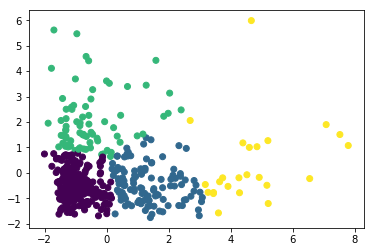

In [81]:
from sklearn.cluster import KMeans
lables = KMeans(n_clusters=4).fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

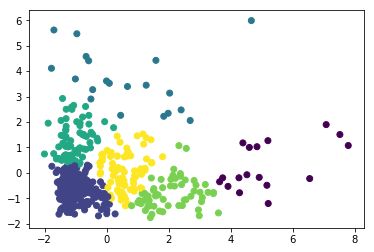

In [98]:
from sklearn.cluster import KMeans
lables = KMeans(n_clusters=6).fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

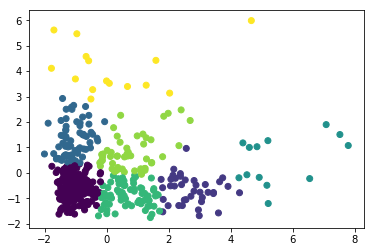

In [97]:
from sklearn.cluster import KMeans
lables = KMeans(n_clusters=7).fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

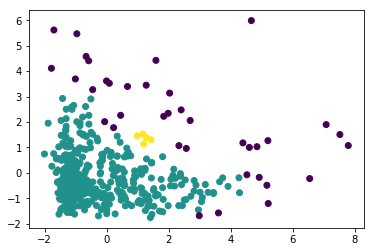

In [99]:
from sklearn.cluster import DBSCAN
lables = DBSCAN().fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

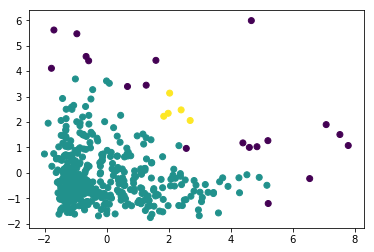

In [110]:
from sklearn.cluster import DBSCAN
lables = DBSCAN(eps=0.8).fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

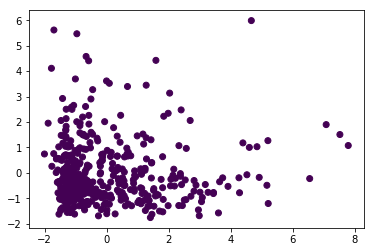

In [120]:
from sklearn.cluster import DBSCAN
lables = DBSCAN(metric='cosine').fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()

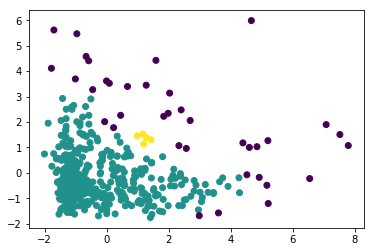

In [123]:
from sklearn.cluster import DBSCAN
lables = DBSCAN(algorithm='brute').fit_predict(X_reduced)
pyplot.scatter(X_reduced[:,0], X_reduced[:,1], c=lables)
pyplot.show()